In [ ]:
# @title Update/Upgrade the system and install libs
!apt-get update > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1\
!apt-get install -y swig build-essential python-dev python3-dev > /dev/null 2>&1
!apt-get install -y xvfb --quiet # added

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 11 not upgraded.
Need to get 7,812 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archive.ubuntu.com/ub

In [ ]:
# @title Install dependencies
!pip install pygame==2.4.0 --quiet
!pip install swig --quiet # added
!pip install rarfile --quiet
!pip install stable-baselines3[extra] --quiet
!pip install ale-py --quiet
!pip install gym[box2d] --quiet
!pip install pyvirtualdisplay --quiet
!pip install pyglet --quiet
!pip install minigrid --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 24.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 853.1/853.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
# @title Imports
import io
import os
import glob
import torch
import base64
import math
from typing import TYPE_CHECKING, Optional

import numpy as np
import matplotlib.pyplot as plt

import sys
import gymnasium
sys.modules["gym"] = gymnasium

import stable_baselines3
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.results_plotter import ts2xy, load_results
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_checker import check_env

import gymnasium as gym
from gym import spaces
from gym.wrappers.monitoring.video_recorder import VideoRecorder
# from gym.envs.box2d import LunarLander
from gym.envs.box2d.lunar_lander import *
# from gym.envs.registration import register
from gymnasium.envs.registration import (
    load_plugin_envs,
    make,
    pprint_registry,
    register,
    registry,
    spec,
)

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


In [ ]:
# @title Play Video function
from IPython.display import HTML
from base64 import b64encode
from pyvirtualdisplay import Display

# create the directory to store the video(s)
os.makedirs("./video", exist_ok=True)

display = Display(visible=False, size=(1400, 900))
_ = display.start()

"""
Utility functions to enable video recording of gym environment
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""
def render_mp4(videopath: str) -> str:
  """
  Gets a string containing a b4-encoded version of the MP4 video
  at the specified path.
  """
  mp4 = open(videopath, 'rb').read()
  base64_encoded_mp4 = b64encode(mp4).decode()
  return f'<video width=400 controls><source src="data:video/mp4;' \
         f'base64,{base64_encoded_mp4}" type="video/mp4"></video>'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# @title Create Env Video function
def create_env_video(env,env_name,model,learned):
  if learned:
    name_str = 'learned'
  else:
    name_str = 'pretraining'

  path = f"video/{env_name}_{name_str}.mp4"

  vid = VideoRecorder(env, path=path)
  observation = env.reset()[0]

  total_reward = 0
  done = False

  max_episode_steps = 1000
  i = 0

  while not done:
    frame = env.render()
    vid.capture_frame()
    action, states = model.predict(observation, deterministic=True)
    observation, reward, done, info, _ = env.step(action)
    total_reward += reward
    i += 1

    if i == max_episode_steps:
      done = True



  vid.close()
  env.close()
  print(f"\nTotal reward: {total_reward}")

  # show video
  html = render_mp4(path)
  HTML(html)
  return total_reward, html

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# @title Evaluate policy function
def evaluate_policyCp(model,env,n_eval_episodes):

  episode_rewards = []
  episode_lengths = []
  # episode_landeds = []
  # episode_checkpoints = []
  times_landed = 0
  times_checkpoint = 0

  max_episode_steps = 1000

  for episode in range(n_eval_episodes):
    # print(episode)
    observation = env.reset()[0]

    total_reward = 0
    done = False
    i = 0

    while not done:
      action, states = model.predict(observation, deterministic=True)
      observation, reward, done, info, _ = env.step(action)
      total_reward += reward
      i += 1

      if i == max_episode_steps:
        done = True
        print('done!')


    episode_rewards.append(total_reward)
    episode_lengths.append(i)
    # episode_landeds.append(int(env.landed))
    # episode_checkpoints.append(int(env.checkpoint_visited))
    times_landed += int(env.landed)
    times_checkpoint += int(env.checkpoint_visited)

  ratio_landed = round(times_landed / n_eval_episodes * 100,1)
  ratio_checkpoint = round(times_checkpoint / n_eval_episodes * 100,1)

  return episode_rewards,episode_lengths,ratio_landed,ratio_checkpoint

In [ ]:
# @title Custom baseline LunderLander environment
# ensures correct starting point, minimal other changes

class cLunarLander(LunarLander):
  """Custom Environment that follows gym interface."""

  metadata = {"render_modes": ["human","rgb_array"], "render_fps": 30}

  def __init__(self,**kw):
    super().__init__(**kw)

    low = np.array(
        [
            # these are bounds for position
            # realistically the environment should have ended
            # long before we reach more than 50% outside
            -1.5,
            -1.5,
            # velocity bounds is 5x rated speed
            -5.0,
            -5.0,
            -math.pi,
            -5.0,
            -0.0,
            -0.0,
        ]
    ).astype(np.float32)
    high = np.array(
        [
            # these are bounds for position
            # realistically the environment should have ended
            # long before we reach more than 50% outside
            1.5,
            1.5,
            # velocity bounds is 5x rated speed
            5.0,
            5.0,
            math.pi,
            5.0,
            1.0,
            1.0,
        ]
    ).astype(np.float32)

    # print(low,high)
    # useful range is -1 .. +1, but spikes can be higher
    self.observation_space = spaces.Box(low, high)

    if self.continuous:
        # Action is two floats [main engine, left-right engines].
        # Main engine: -1..0 off, 0..+1 throttle from 50% to 100% power. Engine can't work with less than 50% power.
        # Left-right:  -1.0..-0.5 fire left engine, +0.5..+1.0 fire right engine, -0.5..0.5 off
        self.action_space = spaces.Box(-1, +1, (2,), dtype=np.float32)
    else:
        # Nop, fire left engine, main engine, right engine
        self.action_space = spaces.Discrete(4)

    self.prev_angle = None


  def step(self, action):
    assert self.lander is not None

    FPS = 50
    SCALE = 30.0  # affects how fast-paced the game is, forces should be adjusted as well

    MAIN_ENGINE_POWER = 13.0
    SIDE_ENGINE_POWER = 0.6

    INITIAL_RANDOM = 1000.0  # Set 1500 to make game harder

    LANDER_POLY = [(-14, +17), (-17, 0), (-17, -10), (+17, -10), (+17, 0), (+14, +17)]
    LEG_AWAY = 20
    LEG_DOWN = 18
    LEG_W, LEG_H = 2, 8
    LEG_SPRING_TORQUE = 40

    SIDE_ENGINE_HEIGHT = 14
    SIDE_ENGINE_AWAY = 12
    MAIN_ENGINE_Y_LOCATION = (
        4  # The Y location of the main engine on the body of the Lander.
    )

    VIEWPORT_W = 600
    VIEWPORT_H = 400

    # Update wind and apply to the lander
    assert self.lander is not None, "You forgot to call reset()"
    if self.enable_wind and not (
        self.legs[0].ground_contact or self.legs[1].ground_contact
    ):
        # the function used for wind is tanh(sin(2 k x) + sin(pi k x)),
        # which is proven to never be periodic, k = 0.01
        wind_mag = (
            math.tanh(
                math.sin(0.02 * self.wind_idx)
                + (math.sin(math.pi * 0.01 * self.wind_idx))
            )
            * self.wind_power
        )
        self.wind_idx += 1
        self.lander.ApplyForceToCenter(
            (wind_mag, 0.0),
            True,
        )

        # the function used for torque is tanh(sin(2 k x) + sin(pi k x)),
        # which is proven to never be periodic, k = 0.01
        torque_mag = math.tanh(
            math.sin(0.02 * self.torque_idx)
            + (math.sin(math.pi * 0.01 * self.torque_idx))
        ) * (self.turbulence_power)
        self.torque_idx += 1
        self.lander.ApplyTorque(
            (torque_mag),
            True,
        )

    if self.continuous:
        action = np.clip(action, -1, +1).astype(np.float32)
    else:
        assert self.action_space.contains(
            action
        ), f"{action!r} ({type(action)}) invalid "

    # Apply Engine Impulses

    # Tip is a the (X and Y) components of the rotation of the lander.
    tip = (math.sin(self.lander.angle), math.cos(self.lander.angle))

    # Side is the (-Y and X) components of the rotation of the lander.
    side = (-tip[1], tip[0])

    # Generate two random numbers between -1/SCALE and 1/SCALE.
    dispersion = [self.np_random.uniform(-1.0, +1.0) / SCALE for _ in range(2)]

    m_power = 0.0
    if (self.continuous and action[0] > 0.0) or (
        not self.continuous and action == 2
    ):
        # Main engine
        if self.continuous:
            m_power = (np.clip(action[0], 0.0, 1.0) + 1.0) * 0.5  # 0.5..1.0
            assert m_power >= 0.5 and m_power <= 1.0
        else:
            m_power = 1.0

        # 4 is move a bit downwards, +-2 for randomness
        # The components of the impulse to be applied by the main engine.
        ox = (
            tip[0] * (MAIN_ENGINE_Y_LOCATION / SCALE + 2 * dispersion[0])
            + side[0] * dispersion[1]
        )
        oy = (
            -tip[1] * (MAIN_ENGINE_Y_LOCATION / SCALE + 2 * dispersion[0])
            - side[1] * dispersion[1]
        )

        impulse_pos = (self.lander.position[0] + ox, self.lander.position[1] + oy)
        if self.render_mode is not None:
            # particles are just a decoration, with no impact on the physics, so don't add them when not rendering
            p = self._create_particle(
                3.5,  # 3.5 is here to make particle speed adequate
                impulse_pos[0],
                impulse_pos[1],
                m_power,
            )
            p.ApplyLinearImpulse(
                (
                    ox * MAIN_ENGINE_POWER * m_power,
                    oy * MAIN_ENGINE_POWER * m_power,
                ),
                impulse_pos,
                True,
            )
        self.lander.ApplyLinearImpulse(
            (-ox * MAIN_ENGINE_POWER * m_power, -oy * MAIN_ENGINE_POWER * m_power),
            impulse_pos,
            True,
        )

    s_power = 0.0
    if (self.continuous and np.abs(action[1]) > 0.5) or (
        not self.continuous and action in [1, 3]
    ):
        # Orientation/Side engines
        if self.continuous:
            direction = np.sign(action[1])
            s_power = np.clip(np.abs(action[1]), 0.5, 1.0)
            assert s_power >= 0.5 and s_power <= 1.0
        else:
            # action = 1 is left, action = 3 is right
            direction = action - 2
            s_power = 1.0

        # The components of the impulse to be applied by the side engines.
        ox = tip[0] * dispersion[0] + side[0] * (
            3 * dispersion[1] + direction * SIDE_ENGINE_AWAY / SCALE
        )
        oy = -tip[1] * dispersion[0] - side[1] * (
            3 * dispersion[1] + direction * SIDE_ENGINE_AWAY / SCALE
        )

        # The constant 17 is a constant, that is presumably meant to be SIDE_ENGINE_HEIGHT.
        # However, SIDE_ENGINE_HEIGHT is defined as 14
        # This casuses the position of the thurst on the body of the lander to change, depending on the orientation of the lander.
        # This in turn results in an orientation depentant torque being applied to the lander.
        impulse_pos = (
            # self.lander.position[0] + ox - tip[0] * 17 / SCALE,
            self.lander.position[0] + ox - tip[0] * SIDE_ENGINE_HEIGHT / SCALE, # added; replaced the line above
            self.lander.position[1] + oy + tip[1] * SIDE_ENGINE_HEIGHT / SCALE,
        )
        if self.render_mode is not None:
            # particles are just a decoration, with no impact on the physics, so don't add them when not rendering
            p = self._create_particle(0.7, impulse_pos[0], impulse_pos[1], s_power)
            p.ApplyLinearImpulse(
                (
                    ox * SIDE_ENGINE_POWER * s_power,
                    oy * SIDE_ENGINE_POWER * s_power,
                ),
                impulse_pos,
                True,
            )
        self.lander.ApplyLinearImpulse(
            (-ox * SIDE_ENGINE_POWER * s_power, -oy * SIDE_ENGINE_POWER * s_power),
            impulse_pos,
            True,
        )

    self.world.Step(1.0 / FPS, 6 * 30, 2 * 30)

    pos = self.lander.position
    vel = self.lander.linearVelocity

    state = [
        (pos.x - VIEWPORT_W / SCALE / 2) / (VIEWPORT_W / SCALE / 2),
        (pos.y - (self.helipad_y + LEG_DOWN / SCALE)) / (VIEWPORT_H / SCALE / 2),
        vel.x * (VIEWPORT_W / SCALE / 2) / FPS,
        vel.y * (VIEWPORT_H / SCALE / 2) / FPS,
        self.lander.angle,
        20.0 * self.lander.angularVelocity / FPS,
        1.0 if self.legs[0].ground_contact else 0.0,
        1.0 if self.legs[1].ground_contact else 0.0,
    ]
    assert len(state) == 8

    reward = 0
    # if state[5] != 0:
    #   ang_v_r = 10 * np.exp(abs(state[5]))
    # else:
    #   ang_v_r = 0

    # updated
    # shaping = (
    #     -100 * np.sqrt(state[0] * state[0] + state[1] * state[1])
    #     - 100 * np.sqrt(state[2] * state[2] + state[3] * state[3])
    #     + 10 * abs(state[4])
    #     + 10 * state[6]
    #     + 10 * state[7]
    # )
    # + 10 * abs(state[4]) % 2*np.pi
    # + 10 * abs(state[4]) - landing learned with small tilts
    # + np.log(np.degrees(abs(state[5]))) # added

    # original
    shaping = (
            -100 * np.sqrt(state[0] * state[0] + state[1] * state[1])
            - 100 * np.sqrt(state[2] * state[2] + state[3] * state[3])
            - 100 * abs(state[4])
            + 10 * state[6]
            + 10 * state[7]
    )
    # And ten points for legs contact, the idea is if you
    # # lose contact again after landing, you get negative reward

    # encourage using fuel to do acrobatics
    # reward += (
    #     m_power * 0.30
    # )  # less fuel spent is better, about -30 for heuristic landing
    # reward += s_power * 0.03

    if self.prev_shaping is not None:
        reward = shaping - self.prev_shaping
    self.prev_shaping = shaping

    # reward += (abs(state[5]))  # 10**(abs(state[5])) # added
    # height_thresh = 0.7

    # if state[1] > height_thresh:
    #   shaping += 50 * abs(state[4]) # % 2*np.pi
    #   # reward += abs(state[4]) % 2*np.pi
    # else:
    #   shaping -= - 100 * abs(state[4])


    # angle = 100 * abs(state[4]) # % 2*np.pi
    # if self.prev_angle is not None:
    #   # print(angle - self.prev_angle)
    #   reward += angle - self.prev_angle
    # self.prev_angle = angle

    reward -= (
    m_power * 0.30
    )  # less fuel spent is better, about -30 for heuristic landing
    reward -= s_power * 0.03


    terminated = False
    if self.game_over or abs(state[0]) >= 1.0:
        terminated = True
        reward = -100
    if not self.lander.awake:
        terminated = True
        reward = +100

    if self.render_mode == "human":
        self.render()

    return np.array(state, dtype=np.float32), reward, terminated, False, {}

  # def reset(self,seed=None,options=None):
  #   out = super(cLunarLander,self).reset(seed=seed,options=options)
  #   return out

  def reset(
      self,
      *,
      seed: Optional[int] = None,
      options: Optional[dict] = None,
  ):
      super().reset(seed=seed)
      self._destroy()
      self.world.contactListener_keepref = ContactDetector(self)
      self.world.contactListener = self.world.contactListener_keepref
      self.game_over = False
      self.prev_shaping = None
      self.prev_angle = None # added

      W = VIEWPORT_W / SCALE
      H = VIEWPORT_H / SCALE

      # Create Terrain
      CHUNKS = 11
      height = self.np_random.uniform(0, H / 2, size=(CHUNKS + 1,))
      chunk_x = [W / (CHUNKS - 1) * i for i in range(CHUNKS)]
      self.helipad_x1 = chunk_x[CHUNKS // 2 - 1]
      self.helipad_x2 = chunk_x[CHUNKS // 2 + 1]
      self.helipad_y = H / 4
      height[CHUNKS // 2 - 2] = self.helipad_y
      height[CHUNKS // 2 - 1] = self.helipad_y
      height[CHUNKS // 2 + 0] = self.helipad_y
      height[CHUNKS // 2 + 1] = self.helipad_y
      height[CHUNKS // 2 + 2] = self.helipad_y
      smooth_y = [
          0.33 * (height[i - 1] + height[i + 0] + height[i + 1])
          for i in range(CHUNKS)
      ]

      self.moon = self.world.CreateStaticBody(
          shapes=edgeShape(vertices=[(0, 0), (W, 0)])
      )
      self.sky_polys = []
      for i in range(CHUNKS - 1):
          p1 = (chunk_x[i], smooth_y[i])
          p2 = (chunk_x[i + 1], smooth_y[i + 1])
          self.moon.CreateEdgeFixture(vertices=[p1, p2], density=0, friction=0.1)
          self.sky_polys.append([p1, p2, (p2[0], H), (p1[0], H)])

      self.moon.color1 = (0.0, 0.0, 0.0)
      self.moon.color2 = (0.0, 0.0, 0.0)

      # Create Lander body
      initial_y = VIEWPORT_H / SCALE
      initial_x = VIEWPORT_W / SCALE / 2
      self.lander: Box2D.b2Body = self.world.CreateDynamicBody(
          position=(initial_x, initial_y),
          angle=0.0,
          fixtures=fixtureDef(
              shape=polygonShape(
                  vertices=[(x / SCALE, y / SCALE) for x, y in LANDER_POLY]
              ),
              density=5.0,
              friction=0.1,
              categoryBits=0x0010,
              maskBits=0x001,  # collide only with ground
              restitution=0.0,
          ),  # 0.99 bouncy
      )
      self.lander.color1 = (128, 102, 230)
      self.lander.color2 = (77, 77, 128)

      # Apply the initial random impulse to the lander
      self.lander.ApplyForceToCenter(
          (
              self.np_random.uniform(-INITIAL_RANDOM, INITIAL_RANDOM),
              self.np_random.uniform(-INITIAL_RANDOM, INITIAL_RANDOM),
          ),
          True,
      )

      # Create Lander Legs
      self.legs = []
      for i in [-1, +1]:
          leg = self.world.CreateDynamicBody(
              position=(initial_x - i * LEG_AWAY / SCALE, initial_y),
              angle=(i * 0.05),
              fixtures=fixtureDef(
                  shape=polygonShape(box=(LEG_W / SCALE, LEG_H / SCALE)),
                  density=1.0,
                  restitution=0.0,
                  categoryBits=0x0020,
                  maskBits=0x001,
              ),
          )
          leg.ground_contact = False
          leg.color1 = (128, 102, 230)
          leg.color2 = (77, 77, 128)
          rjd = revoluteJointDef(
              bodyA=self.lander,
              bodyB=leg,
              localAnchorA=(0, 0),
              localAnchorB=(i * LEG_AWAY / SCALE, LEG_DOWN / SCALE),
              enableMotor=True,
              enableLimit=True,
              maxMotorTorque=LEG_SPRING_TORQUE,
              motorSpeed=+0.3 * i,  # low enough not to jump back into the sky
          )
          if i == -1:
              rjd.lowerAngle = (
                  +0.9 - 0.5
              )  # The most esoteric numbers here, angled legs have freedom to travel within
              rjd.upperAngle = +0.9
          else:
              rjd.lowerAngle = -0.9
              rjd.upperAngle = -0.9 + 0.5
          leg.joint = self.world.CreateJoint(rjd)
          self.legs.append(leg)

      self.drawlist = [self.lander] + self.legs

      if self.render_mode == "human":
          self.render()
      return self.step(np.array([0, 0]) if self.continuous else 0)[0], {}


  # def render(self):
  #   super(cLunarLander,self).render()

  def render(self):
      if self.render_mode is None:
          assert self.spec is not None
          gym.logger.warn(
              "You are calling render method without specifying any render mode. "
              "You can specify the render_mode at initialization, "
              f'e.g. gym.make("{self.spec.id}", render_mode="rgb_array")'
          )
          return

      try:
          import pygame
          from pygame import gfxdraw
      except ImportError as e:
          raise DependencyNotInstalled(
              "pygame is not installed, run `pip install gymnasium[box2d]`"
          ) from e

      if self.screen is None and self.render_mode == "human":
          pygame.init()
          pygame.display.init()
          self.screen = pygame.display.set_mode((VIEWPORT_W, VIEWPORT_H))
      if self.clock is None:
          self.clock = pygame.time.Clock()

      self.surf = pygame.Surface((VIEWPORT_W, VIEWPORT_H))

      pygame.transform.scale(self.surf, (SCALE, SCALE))
      pygame.draw.rect(self.surf, (255, 255, 255), self.surf.get_rect())

      for obj in self.particles:
          obj.ttl -= 0.15
          obj.color1 = (
              int(max(0.2, 0.15 + obj.ttl) * 255),
              int(max(0.2, 0.5 * obj.ttl) * 255),
              int(max(0.2, 0.5 * obj.ttl) * 255),
          )
          obj.color2 = (
              int(max(0.2, 0.15 + obj.ttl) * 255),
              int(max(0.2, 0.5 * obj.ttl) * 255),
              int(max(0.2, 0.5 * obj.ttl) * 255),
          )

      self._clean_particles(False)

      for p in self.sky_polys:
          scaled_poly = []
          for coord in p:
              scaled_poly.append((coord[0] * SCALE, coord[1] * SCALE))
          pygame.draw.polygon(self.surf, (0, 0, 0), scaled_poly)
          gfxdraw.aapolygon(self.surf, scaled_poly, (0, 0, 0))

      for obj in self.particles + self.drawlist:
          for f in obj.fixtures:
              trans = f.body.transform
              if type(f.shape) is circleShape:
                  pygame.draw.circle(
                      self.surf,
                      color=obj.color1,
                      center=trans * f.shape.pos * SCALE,
                      radius=f.shape.radius * SCALE,
                  )
                  pygame.draw.circle(
                      self.surf,
                      color=obj.color2,
                      center=trans * f.shape.pos * SCALE,
                      radius=f.shape.radius * SCALE,
                  )

              else:
                  path = [trans * v * SCALE for v in f.shape.vertices]
                  pygame.draw.polygon(self.surf, color=obj.color1, points=path)
                  gfxdraw.aapolygon(self.surf, path, obj.color1)
                  pygame.draw.aalines(
                      self.surf, color=obj.color2, points=path, closed=True
                  )

              for x in [self.helipad_x1, self.helipad_x2]:
                  x = x * SCALE
                  flagy1 = self.helipad_y * SCALE
                  flagy2 = flagy1 + 50
                  pygame.draw.line(
                      self.surf,
                      color=(255, 255, 255),
                      start_pos=(x, flagy1),
                      end_pos=(x, flagy2),
                      width=1,
                  )
                  pygame.draw.polygon(
                      self.surf,
                      color=(204, 204, 0),
                      points=[
                          (x, flagy2),
                          (x, flagy2 - 10),
                          (x + 25, flagy2 - 5),
                      ],
                  )
                  gfxdraw.aapolygon(
                      self.surf,
                      [(x, flagy2), (x, flagy2 - 10), (x + 25, flagy2 - 5)],
                      (204, 204, 0),
                  )

      self.surf = pygame.transform.flip(self.surf, False, True)

      if self.render_mode == "human":
          assert self.screen is not None
          self.screen.blit(self.surf, (0, 0))
          pygame.event.pump()
          self.clock.tick(self.metadata["render_fps"])
          pygame.display.flip()
      elif self.render_mode == "rgb_array":
          return np.transpose(
              np.array(pygame.surfarray.pixels3d(self.surf)), axes=(1, 0, 2)
          )

  # def close(self):
  #   super(cLunarLander,self).close()
  def close(self):
      if self.screen is not None:
          import pygame

          pygame.display.quit()
          pygame.quit()
          self.isopen = False

  def print_base(self):
    for base in self.__class__.__bases__:
      print(base.__name__)


In [ ]:
# @title Obstacle environment (unused)
class cLunarLanderO(LunarLander):
  """Custom Environment that follows gym interface."""

  metadata = {"render_modes": ["human","rgb_array"], "render_fps": 30}

  def __init__(self,**kw):
    super().__init__(**kw)

    low = np.array(
        [
            # these are bounds for position
            # realistically the environment should have ended
            # long before we reach more than 50% outside
            -1.5,
            -1.5,
            # velocity bounds is 5x rated speed
            -5.0,
            -5.0,
            -math.pi,
            -5.0,
            -0.0,
            -0.0,
        ]
    ).astype(np.float32)
    high = np.array(
        [
            # these are bounds for position
            # realistically the environment should have ended
            # long before we reach more than 50% outside
            1.5,
            1.5,
            # velocity bounds is 5x rated speed
            5.0,
            5.0,
            math.pi,
            5.0,
            1.0,
            1.0,
        ]
    ).astype(np.float32)

    # print(low,high)
    # useful range is -1 .. +1, but spikes can be higher
    self.observation_space = spaces.Box(low, high)

    if self.continuous:
        # Action is two floats [main engine, left-right engines].
        # Main engine: -1..0 off, 0..+1 throttle from 50% to 100% power. Engine can't work with less than 50% power.
        # Left-right:  -1.0..-0.5 fire left engine, +0.5..+1.0 fire right engine, -0.5..0.5 off
        self.action_space = spaces.Box(-1, +1, (2,), dtype=np.float32)
    else:
        # Nop, fire left engine, main engine, right engine
        self.action_space = spaces.Discrete(4)

    self.prev_angle = None

  def step(self, action):
    assert self.lander is not None

    FPS = 50
    SCALE = 30.0  # affects how fast-paced the game is, forces should be adjusted as well

    MAIN_ENGINE_POWER = 13.0
    SIDE_ENGINE_POWER = 0.6

    INITIAL_RANDOM = 1000.0  # Set 1500 to make game harder

    LANDER_POLY = [(-14, +17), (-17, 0), (-17, -10), (+17, -10), (+17, 0), (+14, +17)]
    LEG_AWAY = 20
    LEG_DOWN = 18
    LEG_W, LEG_H = 2, 8
    LEG_SPRING_TORQUE = 40

    SIDE_ENGINE_HEIGHT = 14
    SIDE_ENGINE_AWAY = 12
    MAIN_ENGINE_Y_LOCATION = (
        4  # The Y location of the main engine on the body of the Lander.
    )

    VIEWPORT_W = 600
    VIEWPORT_H = 400

    OBSTACLE_W = 0
    OBSTACLE_H = 0.75 # 0.75
    DIST_FROM_OBSTACLE = [0,0]

    # Update wind and apply to the lander
    assert self.lander is not None, "You forgot to call reset()"
    if self.enable_wind and not (
        self.legs[0].ground_contact or self.legs[1].ground_contact
    ):
        # the function used for wind is tanh(sin(2 k x) + sin(pi k x)),
        # which is proven to never be periodic, k = 0.01
        wind_mag = (
            math.tanh(
                math.sin(0.02 * self.wind_idx)
                + (math.sin(math.pi * 0.01 * self.wind_idx))
            )
            * self.wind_power
        )
        self.wind_idx += 1
        self.lander.ApplyForceToCenter(
            (wind_mag, 0.0),
            True,
        )

        # the function used for torque is tanh(sin(2 k x) + sin(pi k x)),
        # which is proven to never be periodic, k = 0.01
        torque_mag = math.tanh(
            math.sin(0.02 * self.torque_idx)
            + (math.sin(math.pi * 0.01 * self.torque_idx))
        ) * (self.turbulence_power)
        self.torque_idx += 1
        self.lander.ApplyTorque(
            (torque_mag),
            True,
        )

    if self.continuous:
        action = np.clip(action, -1, +1).astype(np.float32)
    else:
        assert self.action_space.contains(
            action
        ), f"{action!r} ({type(action)}) invalid "

    # Apply Engine Impulses

    # Tip is a the (X and Y) components of the rotation of the lander.
    tip = (math.sin(self.lander.angle), math.cos(self.lander.angle))

    # Side is the (-Y and X) components of the rotation of the lander.
    side = (-tip[1], tip[0])

    # Generate two random numbers between -1/SCALE and 1/SCALE.
    dispersion = [self.np_random.uniform(-1.0, +1.0) / SCALE for _ in range(2)]

    m_power = 0.0
    if (self.continuous and action[0] > 0.0) or (
        not self.continuous and action == 2
    ):
        # Main engine
        if self.continuous:
            m_power = (np.clip(action[0], 0.0, 1.0) + 1.0) * 0.5  # 0.5..1.0
            assert m_power >= 0.5 and m_power <= 1.0
        else:
            m_power = 1.0

        # 4 is move a bit downwards, +-2 for randomness
        # The components of the impulse to be applied by the main engine.
        ox = (
            tip[0] * (MAIN_ENGINE_Y_LOCATION / SCALE + 2 * dispersion[0])
            + side[0] * dispersion[1]
        )
        oy = (
            -tip[1] * (MAIN_ENGINE_Y_LOCATION / SCALE + 2 * dispersion[0])
            - side[1] * dispersion[1]
        )

        impulse_pos = (self.lander.position[0] + ox, self.lander.position[1] + oy)
        if self.render_mode is not None:
            # particles are just a decoration, with no impact on the physics, so don't add them when not rendering
            p = self._create_particle(
                3.5,  # 3.5 is here to make particle speed adequate
                impulse_pos[0],
                impulse_pos[1],
                m_power,
            )
            p.ApplyLinearImpulse(
                (
                    ox * MAIN_ENGINE_POWER * m_power,
                    oy * MAIN_ENGINE_POWER * m_power,
                ),
                impulse_pos,
                True,
            )
        self.lander.ApplyLinearImpulse(
            (-ox * MAIN_ENGINE_POWER * m_power, -oy * MAIN_ENGINE_POWER * m_power),
            impulse_pos,
            True,
        )

    s_power = 0.0
    if (self.continuous and np.abs(action[1]) > 0.5) or (
        not self.continuous and action in [1, 3]
    ):
        # Orientation/Side engines
        if self.continuous:
            direction = np.sign(action[1])
            s_power = np.clip(np.abs(action[1]), 0.5, 1.0)
            assert s_power >= 0.5 and s_power <= 1.0
        else:
            # action = 1 is left, action = 3 is right
            direction = action - 2
            s_power = 1.0

        # The components of the impulse to be applied by the side engines.
        ox = tip[0] * dispersion[0] + side[0] * (
            3 * dispersion[1] + direction * SIDE_ENGINE_AWAY / SCALE
        )
        oy = -tip[1] * dispersion[0] - side[1] * (
            3 * dispersion[1] + direction * SIDE_ENGINE_AWAY / SCALE
        )

        # The constant 17 is a constant, that is presumably meant to be SIDE_ENGINE_HEIGHT.
        # However, SIDE_ENGINE_HEIGHT is defined as 14
        # This casuses the position of the thurst on the body of the lander to change, depending on the orientation of the lander.
        # This in turn results in an orientation depentant torque being applied to the lander.
        impulse_pos = (
            # self.lander.position[0] + ox - tip[0] * 17 / SCALE,
            self.lander.position[0] + ox - tip[0] * SIDE_ENGINE_HEIGHT / SCALE, # added; replaced the line above
            self.lander.position[1] + oy + tip[1] * SIDE_ENGINE_HEIGHT / SCALE,
        )
        if self.render_mode is not None:
            # particles are just a decoration, with no impact on the physics, so don't add them when not rendering
            p = self._create_particle(0.7, impulse_pos[0], impulse_pos[1], s_power)
            p.ApplyLinearImpulse(
                (
                    ox * SIDE_ENGINE_POWER * s_power,
                    oy * SIDE_ENGINE_POWER * s_power,
                ),
                impulse_pos,
                True,
            )
        self.lander.ApplyLinearImpulse(
            (-ox * SIDE_ENGINE_POWER * s_power, -oy * SIDE_ENGINE_POWER * s_power),
            impulse_pos,
            True,
        )

    self.world.Step(1.0 / FPS, 6 * 30, 2 * 30)

    pos = self.lander.position
    vel = self.lander.linearVelocity

    state = [
        (pos.x - VIEWPORT_W / SCALE / 2) / (VIEWPORT_W / SCALE / 2),
        (pos.y - (self.helipad_y + LEG_DOWN / SCALE)) / (VIEWPORT_H / SCALE / 2),
        vel.x * (VIEWPORT_W / SCALE / 2) / FPS,
        vel.y * (VIEWPORT_H / SCALE / 2) / FPS,
        self.lander.angle,
        20.0 * self.lander.angularVelocity / FPS,
        1.0 if self.legs[0].ground_contact else 0.0,
        1.0 if self.legs[1].ground_contact else 0.0,
    ]
    assert len(state) == 8

    reward = 0
    # if state[5] != 0:
    #   ang_v_r = 10 * np.exp(abs(state[5]))
    # else:
    #   ang_v_r = 0

    DIST_FROM_OBSTACLE[0] = state[0]-OBSTACLE_H # height
    DIST_FROM_OBSTACLE[1] = state[1]-OBSTACLE_W # height

    shaping = (
        -100 * np.sqrt(state[0] * state[0] + state[1] * state[1])
        - 100 * np.sqrt(state[2] * state[2] + state[3] * state[3])
        + 100 * np.sqrt(DIST_FROM_OBSTACLE[0] * DIST_FROM_OBSTACLE[0] + DIST_FROM_OBSTACLE[1] * DIST_FROM_OBSTACLE[1]) # distance from obstacle
        - 100 * abs(state[4])
        + 10 * state[6]
        + 10 * state[7]
    )

    # + 10 * abs(state[4]) % 2*np.pi
    # + 10 * abs(state[4]) - landing learned with small tilts
    # + np.log(np.degrees(abs(state[5]))) # added


    # shaping = (
    #     -100 * np.sqrt(state[0] * state[0] + state[1] * state[1])
    #     - 100 * np.sqrt(state[2] * state[2] + state[3] * state[3])
    #     - 100 * abs(state[4])
    #     + 10 * state[6]
    #     + 10 * state[7]
    # )
    # And ten points for legs contact, the idea is if you
    # # lose contact again after landing, you get negative reward

    # encourage using fuel to do acrobatics
    # reward += (
    #     m_power * 0.30
    # )  # less fuel spent is better, about -30 for heuristic landing
    # reward += s_power * 0.03

    if self.prev_shaping is not None:
        reward = shaping - self.prev_shaping
    self.prev_shaping = shaping

    # reward += (abs(state[5]))  # 10**(abs(state[5])) # added
    # height_thresh = 0.7

    # if state[1] > height_thresh:
    #   shaping += 10 * abs(state[4]) % 2*np.pi
    #   # reward += abs(state[4]) % 2*np.pi
    # else:
    #   shaping -= - 100 * abs(state[4])


    # angle = 100 * abs(state[4]) # % 2*np.pi
    # if self.prev_angle is not None:
    #   # print(angle - self.prev_angle)
    #   reward += angle - self.prev_angle
    # self.prev_angle = angle

    reward -= (
    m_power * 0.30
    )  # less fuel spent is better, about -30 for heuristic landing
    reward -= s_power * 0.03


    terminated = False
    if self.game_over or abs(state[0]) >= 1.0:
        terminated = True
        reward = -100
    if not self.lander.awake:
        terminated = True
        reward = +100

    if self.render_mode == "human":
        self.render()

    return np.array(state, dtype=np.float32), reward, terminated, False, {}

  def reset(
      self,
      *,
      seed: Optional[int] = None,
      options: Optional[dict] = None,
  ):
      super().reset(seed=seed)
      self._destroy()
      self.world.contactListener_keepref = ContactDetector(self)
      self.world.contactListener = self.world.contactListener_keepref
      self.game_over = False
      self.prev_shaping = None
      self.prev_angle = None # added

      W = VIEWPORT_W / SCALE
      H = VIEWPORT_H / SCALE

      # Create Terrain
      CHUNKS = 11
      height = self.np_random.uniform(0, H / 2, size=(CHUNKS + 1,))
      chunk_x = [W / (CHUNKS - 1) * i for i in range(CHUNKS)]
      self.helipad_x1 = chunk_x[CHUNKS // 2 - 1]
      self.helipad_x2 = chunk_x[CHUNKS // 2 + 1]
      self.helipad_y = H / 4
      height[CHUNKS // 2 - 2] = self.helipad_y
      height[CHUNKS // 2 - 1] = self.helipad_y
      height[CHUNKS // 2 + 0] = self.helipad_y
      height[CHUNKS // 2 + 1] = self.helipad_y
      height[CHUNKS // 2 + 2] = self.helipad_y
      smooth_y = [
          0.33 * (height[i - 1] + height[i + 0] + height[i + 1])
          for i in range(CHUNKS)
      ]

      self.moon = self.world.CreateStaticBody(
          shapes=edgeShape(vertices=[(0, 0), (W, 0)])
      )
      self.sky_polys = []
      for i in range(CHUNKS - 1):
          p1 = (chunk_x[i], smooth_y[i])
          p2 = (chunk_x[i + 1], smooth_y[i + 1])
          self.moon.CreateEdgeFixture(vertices=[p1, p2], density=0, friction=0.1)
          self.sky_polys.append([p1, p2, (p2[0], H), (p1[0], H)])

      self.moon.color1 = (0.0, 0.0, 0.0)
      self.moon.color2 = (0.0, 0.0, 0.0)

      # Create Lander body
      initial_y = VIEWPORT_H / SCALE
      initial_x = VIEWPORT_W / SCALE / 2
      self.lander: Box2D.b2Body = self.world.CreateDynamicBody(
          position=(initial_x, initial_y),
          angle=0.0,
          fixtures=fixtureDef(
              shape=polygonShape(
                  vertices=[(x / SCALE, y / SCALE) for x, y in LANDER_POLY]
              ),
              density=5.0,
              friction=0.1,
              categoryBits=0x0010,
              maskBits=0x001,  # collide only with ground
              restitution=0.0,
          ),  # 0.99 bouncy
      )
      self.lander.color1 = (128, 102, 230)
      self.lander.color2 = (77, 77, 128)

      # Apply the initial random impulse to the lander
      self.lander.ApplyForceToCenter(
          (
              self.np_random.uniform(-INITIAL_RANDOM, INITIAL_RANDOM),
              self.np_random.uniform(-INITIAL_RANDOM, INITIAL_RANDOM),
          ),
          True,
      )

      # Create Lander Legs
      self.legs = []
      for i in [-1, +1]:
          leg = self.world.CreateDynamicBody(
              position=(initial_x - i * LEG_AWAY / SCALE, initial_y),
              angle=(i * 0.05),
              fixtures=fixtureDef(
                  shape=polygonShape(box=(LEG_W / SCALE, LEG_H / SCALE)),
                  density=1.0,
                  restitution=0.0,
                  categoryBits=0x0020,
                  maskBits=0x001,
              ),
          )
          leg.ground_contact = False
          leg.color1 = (128, 102, 230)
          leg.color2 = (77, 77, 128)
          rjd = revoluteJointDef(
              bodyA=self.lander,
              bodyB=leg,
              localAnchorA=(0, 0),
              localAnchorB=(i * LEG_AWAY / SCALE, LEG_DOWN / SCALE),
              enableMotor=True,
              enableLimit=True,
              maxMotorTorque=LEG_SPRING_TORQUE,
              motorSpeed=+0.3 * i,  # low enough not to jump back into the sky
          )
          if i == -1:
              rjd.lowerAngle = (
                  +0.9 - 0.5
              )  # The most esoteric numbers here, angled legs have freedom to travel within
              rjd.upperAngle = +0.9
          else:
              rjd.lowerAngle = -0.9
              rjd.upperAngle = -0.9 + 0.5
          leg.joint = self.world.CreateJoint(rjd)
          self.legs.append(leg)

      self.drawlist = [self.lander] + self.legs

      if self.render_mode == "human":
          self.render()
      return self.step(np.array([0, 0]) if self.continuous else 0)[0], {}


  def render(self):
      if self.render_mode is None:
          assert self.spec is not None
          gym.logger.warn(
              "You are calling render method without specifying any render mode. "
              "You can specify the render_mode at initialization, "
              f'e.g. gym.make("{self.spec.id}", render_mode="rgb_array")'
          )
          return

      try:
          import pygame
          from pygame import gfxdraw
      except ImportError as e:
          raise DependencyNotInstalled(
              "pygame is not installed, run `pip install gymnasium[box2d]`"
          ) from e

      if self.screen is None and self.render_mode == "human":
          pygame.init()
          pygame.display.init()
          self.screen = pygame.display.set_mode((VIEWPORT_W, VIEWPORT_H))
      if self.clock is None:
          self.clock = pygame.time.Clock()

      self.surf = pygame.Surface((VIEWPORT_W, VIEWPORT_H))

      pygame.transform.scale(self.surf, (SCALE, SCALE))
      pygame.draw.rect(self.surf, (255, 255, 255), self.surf.get_rect())

      for obj in self.particles:
          obj.ttl -= 0.15
          obj.color1 = (
              int(max(0.2, 0.15 + obj.ttl) * 255),
              int(max(0.2, 0.5 * obj.ttl) * 255),
              int(max(0.2, 0.5 * obj.ttl) * 255),
          )
          obj.color2 = (
              int(max(0.2, 0.15 + obj.ttl) * 255),
              int(max(0.2, 0.5 * obj.ttl) * 255),
              int(max(0.2, 0.5 * obj.ttl) * 255),
          )

      self._clean_particles(False)

      for p in self.sky_polys:
          scaled_poly = []
          for coord in p:
              scaled_poly.append((coord[0] * SCALE, coord[1] * SCALE))
          pygame.draw.polygon(self.surf, (0, 0, 0), scaled_poly)
          gfxdraw.aapolygon(self.surf, scaled_poly, (0, 0, 0))

      for obj in self.particles + self.drawlist:
          for f in obj.fixtures:
              trans = f.body.transform
              if type(f.shape) is circleShape:
                  pygame.draw.circle(
                      self.surf,
                      color=obj.color1,
                      center=trans * f.shape.pos * SCALE,
                      radius=f.shape.radius * SCALE,
                  )
                  pygame.draw.circle(
                      self.surf,
                      color=obj.color2,
                      center=trans * f.shape.pos * SCALE,
                      radius=f.shape.radius * SCALE,
                  )

              else:
                  path = [trans * v * SCALE for v in f.shape.vertices]
                  pygame.draw.polygon(self.surf, color=obj.color1, points=path)
                  gfxdraw.aapolygon(self.surf, path, obj.color1)
                  pygame.draw.aalines(
                      self.surf, color=obj.color2, points=path, closed=True
                  )

              for x in [self.helipad_x1, self.helipad_x2]:
                  x = x * SCALE
                  flagy1 = self.helipad_y * SCALE
                  flagy2 = flagy1 + 50
                  pygame.draw.line(
                      self.surf,
                      color=(255, 255, 255),
                      start_pos=(x, flagy1),
                      end_pos=(x, flagy2),
                      width=1,
                  )
                  pygame.draw.polygon(
                      self.surf,
                      color=(204, 204, 0),
                      points=[
                          (x, flagy2),
                          (x, flagy2 - 10),
                          (x + 25, flagy2 - 5),
                      ],
                  )
                  gfxdraw.aapolygon(
                      self.surf,
                      [(x, flagy2), (x, flagy2 - 10), (x + 25, flagy2 - 5)],
                      (204, 204, 0),
                  )

      self.surf = pygame.transform.flip(self.surf, False, True)

      if self.render_mode == "human":
          assert self.screen is not None
          self.screen.blit(self.surf, (0, 0))
          pygame.event.pump()
          self.clock.tick(self.metadata["render_fps"])
          pygame.display.flip()
      elif self.render_mode == "rgb_array":
          return np.transpose(
              np.array(pygame.surfarray.pixels3d(self.surf)), axes=(1, 0, 2)
          )


  def close(self):
      if self.screen is not None:
          import pygame

          pygame.display.quit()
          pygame.quit()
          self.isopen = False


In [ ]:
# @title Checkpoint environmnent
class cLunarLanderCp(LunarLander):
  """Custom Environment that follows gym interface."""

  metadata = {"render_modes": ["human","rgb_array"], "render_fps": 30}

  def __init__(self,**kw):
    super().__init__(**kw)

    low = np.array(
        [
            # these are bounds for position
            # realistically the environment should have ended
            # long before we reach more than 50% outside
            -1.5,
            -1.5,
            # velocity bounds is 5x rated speed
            -5.0,
            -5.0,
            -math.pi,
            -5.0,
            -0.0,
            -0.0,
        ]
    ).astype(np.float32)
    high = np.array(
        [
            # these are bounds for position
            # realistically the environment should have ended
            # long before we reach more than 50% outside
            1.5,
            1.5,
            # velocity bounds is 5x rated speed
            5.0,
            5.0,
            math.pi,
            5.0,
            1.0,
            1.0,
        ]
    ).astype(np.float32)

    # print(low,high)
    # useful range is -1 .. +1, but spikes can be higher
    self.observation_space = spaces.Box(low, high)

    if self.continuous:
        # Action is two floats [main engine, left-right engines].
        # Main engine: -1..0 off, 0..+1 throttle from 50% to 100% power. Engine can't work with less than 50% power.
        # Left-right:  -1.0..-0.5 fire left engine, +0.5..+1.0 fire right engine, -0.5..0.5 off
        self.action_space = spaces.Box(-1, +1, (2,), dtype=np.float32)
    else:
        # Nop, fire left engine, main engine, right engine
        self.action_space = spaces.Discrete(4)

    # self.prev_angle = None
    # self.checkpoint_visisted = False
    # self.landed = False


  def step(self, action):
    assert self.lander is not None

    FPS = 50
    SCALE = 30.0  # affects how fast-paced the game is, forces should be adjusted as well

    MAIN_ENGINE_POWER = 13.0
    SIDE_ENGINE_POWER = 0.6

    INITIAL_RANDOM = 1000.0  # Set 1500 to make game harder

    LANDER_POLY = [(-14, +17), (-17, 0), (-17, -10), (+17, -10), (+17, 0), (+14, +17)]
    LEG_AWAY = 20
    LEG_DOWN = 18
    LEG_W, LEG_H = 2, 8
    LEG_SPRING_TORQUE = 40

    SIDE_ENGINE_HEIGHT = 14
    SIDE_ENGINE_AWAY = 12
    MAIN_ENGINE_Y_LOCATION = (
        4  # The Y location of the main engine on the body of the Lander.
    )

    VIEWPORT_W = 600
    VIEWPORT_H = 400

    OBSTACLE_X = 0
    OBSTACLE_Y = 0.75 # 0.75
    DIST_FROM_OBSTACLE = [0,0]

    CHECKPOINT_X = -0.5 # -0.25
    CHECKPOINT_Y = 0.75
    DIST_FROM_CHECKPOINT = [abs(CHECKPOINT_X),abs(CHECKPOINT_Y)]

    CHECKPOINT_DIM = 0.2 # 0.4 # 0.2 x 0.2: W = [-0.85,-0.65], H = [0.65, 0.85]
    MIN_ABS_CHECKPOINT_DIST = np.sqrt((CHECKPOINT_DIM/2)**2 + (CHECKPOINT_DIM/2)**2)


    # Update wind and apply to the lander
    assert self.lander is not None, "You forgot to call reset()"
    if self.enable_wind and not (
        self.legs[0].ground_contact or self.legs[1].ground_contact
    ):
        # the function used for wind is tanh(sin(2 k x) + sin(pi k x)),
        # which is proven to never be periodic, k = 0.01
        wind_mag = (
            math.tanh(
                math.sin(0.02 * self.wind_idx)
                + (math.sin(math.pi * 0.01 * self.wind_idx))
            )
            * self.wind_power
        )
        self.wind_idx += 1
        self.lander.ApplyForceToCenter(
            (wind_mag, 0.0),
            True,
        )

        # the function used for torque is tanh(sin(2 k x) + sin(pi k x)),
        # which is proven to never be periodic, k = 0.01
        torque_mag = math.tanh(
            math.sin(0.02 * self.torque_idx)
            + (math.sin(math.pi * 0.01 * self.torque_idx))
        ) * (self.turbulence_power)
        self.torque_idx += 1
        self.lander.ApplyTorque(
            (torque_mag),
            True,
        )

    if self.continuous:
        action = np.clip(action, -1, +1).astype(np.float32)
    else:
        assert self.action_space.contains(
            action
        ), f"{action!r} ({type(action)}) invalid "

    # Apply Engine Impulses

    # Tip is a the (X and Y) components of the rotation of the lander.
    tip = (math.sin(self.lander.angle), math.cos(self.lander.angle))

    # Side is the (-Y and X) components of the rotation of the lander.
    side = (-tip[1], tip[0])

    # Generate two random numbers between -1/SCALE and 1/SCALE.
    dispersion = [self.np_random.uniform(-1.0, +1.0) / SCALE for _ in range(2)]

    m_power = 0.0
    if (self.continuous and action[0] > 0.0) or (
        not self.continuous and action == 2
    ):
        # Main engine
        if self.continuous:
            m_power = (np.clip(action[0], 0.0, 1.0) + 1.0) * 0.5  # 0.5..1.0
            assert m_power >= 0.5 and m_power <= 1.0
        else:
            m_power = 1.0

        # 4 is move a bit downwards, +-2 for randomness
        # The components of the impulse to be applied by the main engine.
        ox = (
            tip[0] * (MAIN_ENGINE_Y_LOCATION / SCALE + 2 * dispersion[0])
            + side[0] * dispersion[1]
        )
        oy = (
            -tip[1] * (MAIN_ENGINE_Y_LOCATION / SCALE + 2 * dispersion[0])
            - side[1] * dispersion[1]
        )

        impulse_pos = (self.lander.position[0] + ox, self.lander.position[1] + oy)
        if self.render_mode is not None:
            # particles are just a decoration, with no impact on the physics, so don't add them when not rendering
            p = self._create_particle(
                3.5,  # 3.5 is here to make particle speed adequate
                impulse_pos[0],
                impulse_pos[1],
                m_power,
            )
            p.ApplyLinearImpulse(
                (
                    ox * MAIN_ENGINE_POWER * m_power,
                    oy * MAIN_ENGINE_POWER * m_power,
                ),
                impulse_pos,
                True,
            )
        self.lander.ApplyLinearImpulse(
            (-ox * MAIN_ENGINE_POWER * m_power, -oy * MAIN_ENGINE_POWER * m_power),
            impulse_pos,
            True,
        )

    s_power = 0.0
    if (self.continuous and np.abs(action[1]) > 0.5) or (
        not self.continuous and action in [1, 3]
    ):
        # Orientation/Side engines
        if self.continuous:
            direction = np.sign(action[1])
            s_power = np.clip(np.abs(action[1]), 0.5, 1.0)
            assert s_power >= 0.5 and s_power <= 1.0
        else:
            # action = 1 is left, action = 3 is right
            direction = action - 2
            s_power = 1.0

        # The components of the impulse to be applied by the side engines.
        ox = tip[0] * dispersion[0] + side[0] * (
            3 * dispersion[1] + direction * SIDE_ENGINE_AWAY / SCALE
        )
        oy = -tip[1] * dispersion[0] - side[1] * (
            3 * dispersion[1] + direction * SIDE_ENGINE_AWAY / SCALE
        )

        # The constant 17 is a constant, that is presumably meant to be SIDE_ENGINE_HEIGHT.
        # However, SIDE_ENGINE_HEIGHT is defined as 14
        # This casuses the position of the thurst on the body of the lander to change, depending on the orientation of the lander.
        # This in turn results in an orientation depentant torque being applied to the lander.
        impulse_pos = (
            # self.lander.position[0] + ox - tip[0] * 17 / SCALE,
            self.lander.position[0] + ox - tip[0] * SIDE_ENGINE_HEIGHT / SCALE, # added; replaced the line above
            self.lander.position[1] + oy + tip[1] * SIDE_ENGINE_HEIGHT / SCALE,
        )
        if self.render_mode is not None:
            # particles are just a decoration, with no impact on the physics, so don't add them when not rendering
            p = self._create_particle(0.7, impulse_pos[0], impulse_pos[1], s_power)
            p.ApplyLinearImpulse(
                (
                    ox * SIDE_ENGINE_POWER * s_power,
                    oy * SIDE_ENGINE_POWER * s_power,
                ),
                impulse_pos,
                True,
            )
        self.lander.ApplyLinearImpulse(
            (-ox * SIDE_ENGINE_POWER * s_power, -oy * SIDE_ENGINE_POWER * s_power),
            impulse_pos,
            True,
        )

    self.world.Step(1.0 / FPS, 6 * 30, 2 * 30)

    pos = self.lander.position
    vel = self.lander.linearVelocity

    state = [
        (pos.x - VIEWPORT_W / SCALE / 2) / (VIEWPORT_W / SCALE / 2),
        (pos.y - (self.helipad_y + LEG_DOWN / SCALE)) / (VIEWPORT_H / SCALE / 2),
        vel.x * (VIEWPORT_W / SCALE / 2) / FPS,
        vel.y * (VIEWPORT_H / SCALE / 2) / FPS,
        self.lander.angle,
        20.0 * self.lander.angularVelocity / FPS,
        1.0 if self.legs[0].ground_contact else 0.0,
        1.0 if self.legs[1].ground_contact else 0.0,
    ]
    assert len(state) == 8

    reward = 0
    # if state[5] != 0:
    #   ang_v_r = 10 * np.exp(abs(state[5]))
    # else:
    #   ang_v_r = 0

    DIST_FROM_OBSTACLE[0] = state[0]-OBSTACLE_X
    DIST_FROM_OBSTACLE[1] = state[1]-OBSTACLE_Y

    DIST_FROM_CHECKPOINT[0] = state[0]-CHECKPOINT_X
    DIST_FROM_CHECKPOINT[1] = state[1]-CHECKPOINT_Y

    if state[1] < CHECKPOINT_Y: #  self.checkpoint_visited
      shaping = (
          -100 * np.sqrt(state[0] * state[0] + state[1] * state[1])
          - 100 * np.sqrt(state[2] * state[2] + state[3] * state[3])
          # + 100 * np.sqrt(DIST_FROM_OBSTACLE[0] * DIST_FROM_OBSTACLE[0] + DIST_FROM_OBSTACLE[1] * DIST_FROM_OBSTACLE[1]) # distance from obstacle
          - 100 * abs(state[4])
          + 10 * state[6]
          + 10 * state[7]
      )

    else:
      shaping = (
          -100 * np.sqrt(state[0] * state[0] + state[1] * state[1])
          - 100 * np.sqrt(state[2] * state[2] + state[3] * state[3])
          - 100 * np.sqrt(DIST_FROM_CHECKPOINT[0] ** 2 + DIST_FROM_CHECKPOINT[1] ** 2)
          # + 100 * np.sqrt(DIST_FROM_OBSTACLE[0] * DIST_FROM_OBSTACLE[0] + DIST_FROM_OBSTACLE[1] * DIST_FROM_OBSTACLE[1]) # distance from obstacle
          - 100 * abs(state[4])
          + 10 * state[6]
          + 10 * state[7]
      )


    # + 10 * abs(state[4]) % 2*np.pi
    # + 10 * abs(state[4]) - landing learned with small tilts
    # + np.log(np.degrees(abs(state[5]))) # added


    # shaping = (
    #     -100 * np.sqrt(state[0] * state[0] + state[1] * state[1])
    #     - 100 * np.sqrt(state[2] * state[2] + state[3] * state[3])
    #     - 100 * abs(state[4])
    #     + 10 * state[6]
    #     + 10 * state[7]
    # )
    # And ten points for legs contact, the idea is if you
    # # lose contact again after landing, you get negative reward

    # encourage using fuel to do acrobatics
    # reward += (
    #     m_power * 0.30
    # )  # less fuel spent is better, about -30 for heuristic landing
    # reward += s_power * 0.03

    if self.prev_shaping is not None:
        reward = shaping - self.prev_shaping
    self.prev_shaping = shaping

    # reward += (abs(state[5]))  # 10**(abs(state[5])) # added
    # height_thresh = 0.7

    # if state[1] > height_thresh:
    #   shaping += 10 * abs(state[4]) % 2*np.pi
    #   # reward += abs(state[4]) % 2*np.pi
    # else:
    #   shaping -= - 100 * abs(state[4])


    # angle = 100 * abs(state[4]) # % 2*np.pi
    # if self.prev_angle is not None:
    #   # print(angle - self.prev_angle)
    #   reward += angle - self.prev_angle
    # self.prev_angle = angle

    reward -= (
    m_power * 0.30
    )  # less fuel spent is better, about -30 for heuristic landing
    reward -= s_power * 0.03

    # check whether checkpoint was reached
    checkpoint_reached = np.sqrt(DIST_FROM_CHECKPOINT[0] ** 2 + DIST_FROM_CHECKPOINT[1] **2) < MIN_ABS_CHECKPOINT_DIST
    if checkpoint_reached and not self.checkpoint_visited:
      reward += 100
      self.checkpoint_visited = True
      print('*** CHECKPOINT VISITED (+100) ***')


    terminated = False
    if self.game_over or abs(state[0]) >= 1.0:
        terminated = True
        reward = -100
        self.landed = False
    if not self.lander.awake:
        terminated = True
        reward = +100
        self.landed = True

    if self.render_mode == "human":
        self.render()

    return np.array(state, dtype=np.float32), reward, terminated, False, {}

  def reset(
      self,
      *,
      seed: Optional[int] = None,
      options: Optional[dict] = None,
  ):
      super().reset(seed=seed)
      self._destroy()
      self.world.contactListener_keepref = ContactDetector(self)
      self.world.contactListener = self.world.contactListener_keepref
      self.game_over = False
      self.prev_shaping = None
      self.checkpoint_visited = False # added
      self.landed = False # added

      W = VIEWPORT_W / SCALE
      H = VIEWPORT_H / SCALE

      # Create Terrain
      CHUNKS = 11
      height = self.np_random.uniform(0, H / 2, size=(CHUNKS + 1,))
      chunk_x = [W / (CHUNKS - 1) * i for i in range(CHUNKS)]
      self.helipad_x1 = chunk_x[CHUNKS // 2 - 1]
      self.helipad_x2 = chunk_x[CHUNKS // 2 + 1]
      self.helipad_y = H / 4
      height[CHUNKS // 2 - 2] = self.helipad_y
      height[CHUNKS // 2 - 1] = self.helipad_y
      height[CHUNKS // 2 + 0] = self.helipad_y
      height[CHUNKS // 2 + 1] = self.helipad_y
      height[CHUNKS // 2 + 2] = self.helipad_y
      smooth_y = [
          0.33 * (height[i - 1] + height[i + 0] + height[i + 1])
          for i in range(CHUNKS)
      ]

      self.moon = self.world.CreateStaticBody(
          shapes=edgeShape(vertices=[(0, 0), (W, 0)])
      )
      self.sky_polys = []
      for i in range(CHUNKS - 1):
          p1 = (chunk_x[i], smooth_y[i])
          p2 = (chunk_x[i + 1], smooth_y[i + 1])
          self.moon.CreateEdgeFixture(vertices=[p1, p2], density=0, friction=0.1)
          self.sky_polys.append([p1, p2, (p2[0], H), (p1[0], H)])

      self.moon.color1 = (0.0, 0.0, 0.0)
      self.moon.color2 = (0.0, 0.0, 0.0)

      # Create Lander body
      initial_y = VIEWPORT_H / SCALE
      initial_x = VIEWPORT_W / SCALE / 2
      self.lander: Box2D.b2Body = self.world.CreateDynamicBody(
          position=(initial_x, initial_y),
          angle=0.0,
          fixtures=fixtureDef(
              shape=polygonShape(
                  vertices=[(x / SCALE, y / SCALE) for x, y in LANDER_POLY]
              ),
              density=5.0,
              friction=0.1,
              categoryBits=0x0010,
              maskBits=0x001,  # collide only with ground
              restitution=0.0,
          ),  # 0.99 bouncy
      )
      self.lander.color1 = (128, 102, 230)
      self.lander.color2 = (77, 77, 128)

      # Apply the initial random impulse to the lander
      self.lander.ApplyForceToCenter(
          (
              self.np_random.uniform(-INITIAL_RANDOM, INITIAL_RANDOM),
              self.np_random.uniform(-INITIAL_RANDOM, INITIAL_RANDOM),
          ),
          True,
      )

      # Create Lander Legs
      self.legs = []
      for i in [-1, +1]:
          leg = self.world.CreateDynamicBody(
              position=(initial_x - i * LEG_AWAY / SCALE, initial_y),
              angle=(i * 0.05),
              fixtures=fixtureDef(
                  shape=polygonShape(box=(LEG_W / SCALE, LEG_H / SCALE)),
                  density=1.0,
                  restitution=0.0,
                  categoryBits=0x0020,
                  maskBits=0x001,
              ),
          )
          leg.ground_contact = False
          leg.color1 = (128, 102, 230)
          leg.color2 = (77, 77, 128)
          rjd = revoluteJointDef(
              bodyA=self.lander,
              bodyB=leg,
              localAnchorA=(0, 0),
              localAnchorB=(i * LEG_AWAY / SCALE, LEG_DOWN / SCALE),
              enableMotor=True,
              enableLimit=True,
              maxMotorTorque=LEG_SPRING_TORQUE,
              motorSpeed=+0.3 * i,  # low enough not to jump back into the sky
          )
          if i == -1:
              rjd.lowerAngle = (
                  +0.9 - 0.5
              )  # The most esoteric numbers here, angled legs have freedom to travel within
              rjd.upperAngle = +0.9
          else:
              rjd.lowerAngle = -0.9
              rjd.upperAngle = -0.9 + 0.5
          leg.joint = self.world.CreateJoint(rjd)
          self.legs.append(leg)

      self.drawlist = [self.lander] + self.legs

      if self.render_mode == "human":
          self.render()
      return self.step(np.array([0, 0]) if self.continuous else 0)[0], {}


  def render(self):
      if self.render_mode is None:
          assert self.spec is not None
          gym.logger.warn(
              "You are calling render method without specifying any render mode. "
              "You can specify the render_mode at initialization, "
              f'e.g. gym.make("{self.spec.id}", render_mode="rgb_array")'
          )
          return

      try:
          import pygame
          from pygame import gfxdraw
      except ImportError as e:
          raise DependencyNotInstalled(
              "pygame is not installed, run `pip install gymnasium[box2d]`"
          ) from e

      if self.screen is None and self.render_mode == "human":
          pygame.init()
          pygame.display.init()
          self.screen = pygame.display.set_mode((VIEWPORT_W, VIEWPORT_H))
      if self.clock is None:
          self.clock = pygame.time.Clock()

      self.surf = pygame.Surface((VIEWPORT_W, VIEWPORT_H))

      pygame.transform.scale(self.surf, (SCALE, SCALE))
      pygame.draw.rect(self.surf, (255, 255, 255), self.surf.get_rect())

      for obj in self.particles:
          obj.ttl -= 0.15
          obj.color1 = (
              int(max(0.2, 0.15 + obj.ttl) * 255),
              int(max(0.2, 0.5 * obj.ttl) * 255),
              int(max(0.2, 0.5 * obj.ttl) * 255),
          )
          obj.color2 = (
              int(max(0.2, 0.15 + obj.ttl) * 255),
              int(max(0.2, 0.5 * obj.ttl) * 255),
              int(max(0.2, 0.5 * obj.ttl) * 255),
          )

      self._clean_particles(False)

      for p in self.sky_polys:
          scaled_poly = []
          for coord in p:
              scaled_poly.append((coord[0] * SCALE, coord[1] * SCALE))
          pygame.draw.polygon(self.surf, (0, 0, 0), scaled_poly)
          gfxdraw.aapolygon(self.surf, scaled_poly, (0, 0, 0))

      for obj in self.particles + self.drawlist:
          for f in obj.fixtures:
              trans = f.body.transform
              if type(f.shape) is circleShape:
                  pygame.draw.circle(
                      self.surf,
                      color=obj.color1,
                      center=trans * f.shape.pos * SCALE,
                      radius=f.shape.radius * SCALE,
                  )
                  pygame.draw.circle(
                      self.surf,
                      color=obj.color2,
                      center=trans * f.shape.pos * SCALE,
                      radius=f.shape.radius * SCALE,
                  )

              else:
                  path = [trans * v * SCALE for v in f.shape.vertices]
                  pygame.draw.polygon(self.surf, color=obj.color1, points=path)
                  gfxdraw.aapolygon(self.surf, path, obj.color1)
                  pygame.draw.aalines(
                      self.surf, color=obj.color2, points=path, closed=True
                  )

              for x in [self.helipad_x1, self.helipad_x2]:
                  x = x * SCALE
                  flagy1 = self.helipad_y * SCALE
                  flagy2 = flagy1 + 50
                  pygame.draw.line(
                      self.surf,
                      color=(255, 255, 255),
                      start_pos=(x, flagy1),
                      end_pos=(x, flagy2),
                      width=1,
                  )
                  pygame.draw.polygon(
                      self.surf,
                      color=(204, 204, 0),
                      points=[
                          (x, flagy2),
                          (x, flagy2 - 10),
                          (x + 25, flagy2 - 5),
                      ],
                  )
                  gfxdraw.aapolygon(
                      self.surf,
                      [(x, flagy2), (x, flagy2 - 10), (x + 25, flagy2 - 5)],
                      (204, 204, 0),
                  )

      self.surf = pygame.transform.flip(self.surf, False, True)

      if self.render_mode == "human":
          assert self.screen is not None
          self.screen.blit(self.surf, (0, 0))
          pygame.event.pump()
          self.clock.tick(self.metadata["render_fps"])
          pygame.display.flip()
      elif self.render_mode == "rgb_array":
          return np.transpose(
              np.array(pygame.surfarray.pixels3d(self.surf)), axes=(1, 0, 2)
          )


  def close(self):
      if self.screen is not None:
          import pygame

          pygame.display.quit()
          pygame.quit()
          self.isopen = False


In [ ]:
%%capture
# @title Register and check all environments

envB_name = 'LunarLander-v2' # baseline implementation

envC_name = 'cLunarLander-v2'
register(
    id=envC_name,
    entry_point=cLunarLander,
    max_episode_steps=1000,
    reward_threshold=200,
)


envCO_name = 'cLunarLanderO-v2'
register(
    id=envCO_name,
    entry_point=cLunarLanderO,
    max_episode_steps=1000,
    reward_threshold=200,
)


envCCp_name = 'cLunarLanderCp-v2'
register(
    id=envCCp_name,
    entry_point=cLunarLanderCp,
    max_episode_steps=1000,
    reward_threshold=200,
)


load_plugin_envs()


env = gym.make(envC_name)
env.print_base()
check_env(env)

env = gym.make(envCO_name)
check_env(env)

env = gym.make(envCCp_name)
check_env(env)


In [ ]:
# @title Environment and sim settings

continuous = False
gravity = -10.0 # -10.0
enable_wind = False
wind_power = 15.0
turbulence_power=1.5
render_mode ="rgb_array"

tot_iterations = 150000

In [ ]:
# Start environnment: cLunarLander
env_name = envC_name

env = gym.make(env_name,continuous=continuous,gravity=gravity,
               enable_wind=enable_wind,wind_power=wind_power,
               turbulence_power=turbulence_power) #,render_mode="rgb_array")

In [ ]:
# @title Model setup
nn_layers = [64, 64]  # This is the configuration of your neural network. Currently, we have two layers, each consisting of 64 neurons.
                      # If you want three layers with 64 neurons each, set the value to [64,64,64] and so on.

learning_rate = 0.001  # .001 This is the step-size with which the gradient descent is carried out.

                       # Tip: Use smaller step-sizes for larger networks.

In [ ]:
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)


env = stable_baselines3.common.monitor.Monitor(env, log_dir )

callback = EvalCallback(env, log_path=log_dir, deterministic=True)
policy_kwargs = dict(activation_fn=torch.nn.ReLU,
                     net_arch=nn_layers)

exploration_initial_eps = 1  # 1; initial value of random action probability. Range is between 0 and 1.
exploration_fraction = 0.3  # 0.5; fraction of entire training period over which the exploration rate is reduced. Range is between 0 and 1.
exploration_final_eps = 0.05  # 0.05; (set by defualt) final value of random action probability. Range is between 0 and 1.

model = DQN("MlpPolicy", env,policy_kwargs = policy_kwargs,
            learning_rate=learning_rate,
            batch_size=1,  # for simplicity, we are not doing batch update.
            buffer_size=1,  # size of experience of replay buffer. Set to 1 as batch update is not done
            learning_starts=1,  # learning starts immediately!
            gamma=0.99,  # discount facto. range is between 0 and 1.
            tau = 1,  # the soft update coefficient for updating the target network
            target_update_interval=1,  # update the target network immediately.
            train_freq=(1,"step"),  # train the network at every step.
            max_grad_norm = 10,  # the maximum value for the gradient clipping
            exploration_initial_eps = exploration_initial_eps,  # initial value of random action probability
            exploration_fraction = exploration_fraction,  # fraction of entire training period over which the exploration rate is reduced
            exploration_final_eps = exploration_final_eps,
            gradient_steps = 1,  # number of gradient steps
            seed = 1,  # seed for the pseudo random generators
            verbose = 0)  # Set verbose to 1 to observe training logs. We encourage you to set the verbose to 1.

In [ ]:
# Environment states and actions
print('State shape: ', env.observation_space.shape)
print('Example state: ', env.observation_space.sample())

print('Number of actions: ', env.action_space.n)
print('Example actions: ', env.action_space.sample(),env.action_space.sample(),env.action_space.sample(),env.action_space.sample())

# print(env.gravity)
# print(env.enable_wind)
# print(env.wind_power)
# print(env.turbulence_power)

State shape:  (8,)
Example state:  [-0.5536433 -0.6069161 -3.9267786 -4.8278413  3.1043828 -2.0219476
  0.9018702  0.8792715]
Number of actions:  4
Example actions:  1 2 3 3


In [ ]:
# Performance before training
env = gym.make(env_name,continuous=continuous,gravity=gravity,
               enable_wind=enable_wind,wind_power=wind_power,
               turbulence_power=turbulence_power,render_mode='rgb_array')

total_reward, html = create_env_video(env,env_name,model,0)
HTML(html)

# vid = VideoRecorder(env, path=f"video/{env_name}_pretraining.mp4")
# observation = env.reset()[0]

# total_reward = 0
# done = False

# horizontal = []
# height = []
# ang = []
# ang_v = []
# reward_t = []
# i = 0

# while not done:
#   frame = env.render()
#   vid.capture_frame()
#   action, states = model.predict(observation, deterministic=True)
#   observation, reward, done, info, _ = env.step(action)
#   total_reward += reward
#   i += 1

# vid.close()
# env.close()
# print(f"\nTotal reward: {total_reward}")

# # show video
# html = render_mp4(f"video/{env_name}_pretraining.mp4")
# HTML(html)

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(



Total reward: -455.58727770813744


In [ ]:
# Run the model
iterations = tot_iterations/2
model.learn(total_timesteps=iterations, log_interval=10, callback=callback)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Eval num_timesteps=10000, episode_reward=-1297.71 +/- 542.50
Episode length: 198.00 +/- 84.03
New best mean reward!
Eval num_timesteps=20000, episode_reward=-641.68 +/- 86.73
Episode length: 925.20 +/- 79.38
New best mean reward!
Eval num_timesteps=30000, episode_reward=-192.63 +/- 33.34
Episode length: 366.60 +/- 82.22
New best mean reward!
Eval num_timesteps=40000, episode_reward=1.68 +/- 91.27
Episode length: 876.80 +/- 150.68
New best mean reward!
Eval num_timesteps=50000, episode_reward=-34.82 +/- 22.71
Episode length: 1000.00 +/- 0.00
Eval num_timesteps=60000, episode_reward=198.84 +/- 57.00
Episode length: 585.20 +/- 209.63
New best mean reward!
Eval num_timesteps=70000, episode_reward=-110.67 +/- 31.30
Episode length: 224.00 +/- 117.08


In [ ]:
# @title Performance evaluation
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

# print(model.observation_space)

mean_reward=190.02 +/- 28.64


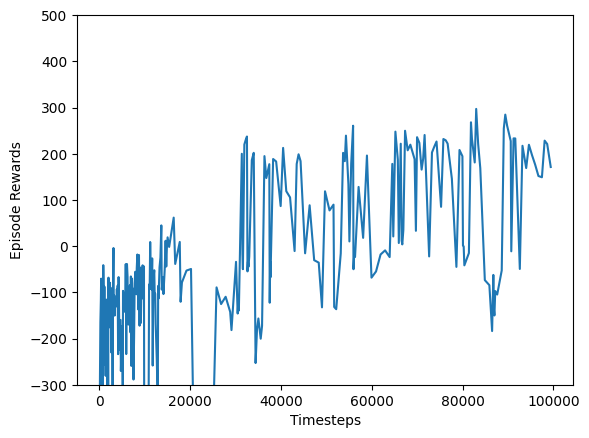

In [ ]:
x, y = ts2xy(load_results(log_dir), 'timesteps')  # Organising the logged results in to a clean format for plotting.
plt.plot(x, y)
plt.ylim([-300, 500])
plt.xlabel('Timesteps')
plt.ylabel('Episode Rewards')
plt.show()

In [ ]:
# Video performance
env = gym.make(env_name,continuous=continuous,gravity=gravity,
               enable_wind=enable_wind,wind_power=wind_power,
               turbulence_power=turbulence_power,render_mode='rgb_array')

total_reward, html = create_env_video(env,env_name,model,1)
HTML(html)


# vid = VideoRecorder(env, path=f"video/{env_name}_learned.mp4")
# observation = env.reset()[0]

# total_reward = 0
# done = False

# while not done:
#   frame = env.render()
#   vid.capture_frame()
#   action, states = model.predict(observation, deterministic=True)
#   observation, reward, done, info, _ = env.step(action)
#   total_reward += reward

# vid.close()
# env.close()
# print(f"\nTotal reward: {total_reward}")

# # show video
# html = render_mp4(f"video/{env_name}_learned.mp4")
# HTML(html)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(



Total reward: 217.99184397737028


In [ ]:
# @title Save trained model
model_path = f"models/{env_name}_trained"
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/save_util.py:278: UserWarning: Path 'models' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


In [ ]:
# @title Transfer learning

In [ ]:
# How to store new log file?
# log_dirO = "/tmp/gymO/"
# os.makedirs(log_dirO, exist_ok=True)
# envO = stable_baselines3.common.monitor.Monitor(envO, log_dirO)
# callback = EvalCallback(envO, log_path=log_dirO, deterministic=True)  # For evaluating the performance of the agent periodically and logging the results.

In [ ]:
# Create Cp environment
env_name = envCCp_name
envCp = gym.make(env_name,continuous=continuous,gravity=gravity,
               enable_wind=enable_wind,wind_power=wind_power,
               turbulence_power=turbulence_power)


In [ ]:
# @title Case 1: Train on pretrained model (transfer learning)
modelCp_tl = DQN.load(model_path,env=envCp,
                  custom_objects=None) # ,enable_wind=False, print_system_info=True

# peformance pre-training
envCp_tl = gym.make(env_name,continuous=continuous,gravity=gravity,
               enable_wind=enable_wind,wind_power=wind_power,
               turbulence_power=turbulence_power,render_mode='rgb_array')
total_reward, html = create_env_video(envCp_tl,env_name+'_TL',modelCp_tl,0)
HTML(html)


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(



Total reward: 290.2290380869547


In [ ]:
# Run the model
modelCp_tl.learn(total_timesteps=tot_iterations/2, log_interval=10, callback=callback)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
Eval num_timesteps=5000, episode_reward=-259.89 +/- 57.76
Episode length: 226.80 +/- 120.33
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
Eval num_timesteps=15000, episode_reward=188.41 +/- 38.85
Episode length: 609.60 +/- 208.16
*** CHECKPOINT VISITED (+100) ***


In [ ]:
# peformance post-training
envCp_tl = gym.make(env_name,continuous=continuous,gravity=gravity,
               enable_wind=enable_wind,wind_power=wind_power,
               turbulence_power=turbulence_power,render_mode='rgb_array')
total_reward, html = create_env_video(envCp_tl,env_name+'_TL',modelCp_tl,1)
HTML(html)

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(


*** CHECKPOINT VISITED (+100) ***

Total reward: 367.76127607678865


In [ ]:
# @title Case 2: Train on fresh model (FreshL)
envCp = gym.make(env_name,continuous=continuous,gravity=gravity,
               enable_wind=enable_wind,wind_power=wind_power,
               turbulence_power=turbulence_power)

envCp = stable_baselines3.common.monitor.Monitor(envCp, log_dir )
callback = EvalCallback(envCp, log_path=log_dir, deterministic=True)  # For evaluating the performance of the agent periodically and logging the results.

modelCp = DQN("MlpPolicy", envCp,policy_kwargs = policy_kwargs,
              learning_rate=learning_rate,
              batch_size=1,  # for simplicity, we are not doing batch update.
              buffer_size=1,  # size of experience of replay buffer. Set to 1 as batch update is not done
              learning_starts=1,  # learning starts immediately!
              gamma=0.99,  # discount facto. range is between 0 and 1.
              tau = 1,  # the soft update coefficient for updating the target network
              target_update_interval=1,  # update the target network immediately.
              train_freq=(1,"step"),  # train the network at every step.
              max_grad_norm = 10,  # the maximum value for the gradient clipping
              exploration_initial_eps = exploration_initial_eps,  # initial value of random action probability
              exploration_fraction = exploration_fraction,  # fraction of entire training period over which the exploration rate is reduced
              exploration_final_eps = exploration_final_eps,
              gradient_steps = 1,  # number of gradient steps
              seed = 1,  # seed for the pseudo random generators
              verbose = 0)  # Set verbose to 1 to observe training logs. We encourage you to set the verbose to 1.


# FreshL peformance pre-training
envCp = gym.make(env_name,continuous=continuous,gravity=gravity,
               enable_wind=enable_wind,wind_power=wind_power,
               turbulence_power=turbulence_power,render_mode='rgb_array')
total_reward, html = create_env_video(envCp,env_name+'_freshL',modelCp,0)
HTML(html)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(


*** CHECKPOINT VISITED (+100) ***

Total reward: -463.40238625830125


In [ ]:
# Run the model
modelCp.learn(total_timesteps=tot_iterations, log_interval=10, callback=callback)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
Eval num_timesteps=10000, episode_reward=-292.91 +/- 38.38
Episode length: 52.40 +/- 1.50
New best mean reward!
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** 

In [ ]:
# FreshL peformance post-training
envCp = gym.make(env_name,continuous=continuous,gravity=gravity,
               enable_wind=enable_wind,wind_power=wind_power,
               turbulence_power=turbulence_power,render_mode='rgb_array')
total_reward, html = create_env_video(envCp,env_name+'_freshL',modelCp,1)
HTML(html)

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(



Total reward: -96.15566500308616


In [ ]:
# @title Case 3: Train on fresh model (FreshL) on reduced number of iterations
envCp_r = gym.make(env_name,continuous=continuous,gravity=gravity,
               enable_wind=enable_wind,wind_power=wind_power,
               turbulence_power=turbulence_power)

envCp_r = stable_baselines3.common.monitor.Monitor(envCp_r, log_dir )
callback = EvalCallback(envCp_r, log_path=log_dir, deterministic=True)  # For evaluating the performance of the agent periodically and logging the results.

modelCp_r = DQN("MlpPolicy", envCp_r,policy_kwargs = policy_kwargs,
              learning_rate=learning_rate,
              batch_size=1,  # for simplicity, we are not doing batch update.
              buffer_size=1,  # size of experience of replay buffer. Set to 1 as batch update is not done
              learning_starts=1,  # learning starts immediately!
              gamma=0.99,  # discount facto. range is between 0 and 1.
              tau = 1,  # the soft update coefficient for updating the target network
              target_update_interval=1,  # update the target network immediately.
              train_freq=(1,"step"),  # train the network at every step.
              max_grad_norm = 10,  # the maximum value for the gradient clipping
              exploration_initial_eps = exploration_initial_eps,  # initial value of random action probability
              exploration_fraction = exploration_fraction,  # fraction of entire training period over which the exploration rate is reduced
              exploration_final_eps = exploration_final_eps,
              gradient_steps = 1,  # number of gradient steps
              seed = 1,  # seed for the pseudo random generators
              verbose = 0)  # Set verbose to 1 to observe training logs. We encourage you to set the verbose to 1.


# FreshL_r peformance pre-training
envCp_r = gym.make(env_name,continuous=continuous,gravity=gravity,
               enable_wind=enable_wind,wind_power=wind_power,
               turbulence_power=turbulence_power,render_mode='rgb_array')
total_reward, html = create_env_video(envCp_r,env_name+'_freshL_r',modelCp_r,0)
HTML(html)


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(



Total reward: -484.97586025625236


In [ ]:
# Run the model
modelCp_r.learn(total_timesteps=tot_iterations/2, log_interval=10, callback=callback)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
Eval num_timesteps=10000, episode_reward=-10.24 +/- 6.43
Episode length: 77.60 +/- 9.91
New best mean reward!
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
Eval num_timesteps=20000, episode_reward=116.51 +/- 145.76
Episode length: 281.60 +/- 114.70
New best mean reward!
*** CHECKPOINT VISITED (+100) ***
Eval num_timesteps=30000, episode_reward=-1.26 +/- 23.74
Episode length: 190.80 +/- 45.07
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
*** CHECKPOINT VISITED (+100) ***
Eval 

In [ ]:
# FreshL_r peformance post-training
envCp_r = gym.make(env_name,continuous=continuous,gravity=gravity,
               enable_wind=enable_wind,wind_power=wind_power,
               turbulence_power=turbulence_power,render_mode='rgb_array')
total_reward, html = create_env_video(envCp,env_name+'_freshL_r',modelCp_r,1)
HTML(html)

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(



Total reward: 246.09128167915927


In [ ]:
%%capture
# @title Performance evaluation: freshL vs TL
n_eval_episodes = 500
env_name = envCCp_name

envCp = gym.make(env_name,continuous=continuous,gravity=gravity,
               enable_wind=enable_wind,wind_power=wind_power,
               turbulence_power=turbulence_power,render_mode='rgb_array')


# original model, iter = tot_iter / 2
episode_rewards,episode_lengths,ratio_landed,ratio_cp = evaluate_policyCp(model,envCp,n_eval_episodes=n_eval_episodes)
# episode_rewards, episode_lengths = evaluate_policy(model, envCp,
#                                                    n_eval_episodes=n_eval_episodes,
#                                                    return_episode_rewards=True)


# TL model, iter = tot_iter
episode_rewardsCp_tl,episode_lengthsCp_tl,ratio_landedCp_tl,ratio_cpCp_tl = evaluate_policyCp(modelCp_tl,envCp,n_eval_episodes=n_eval_episodes)
# episode_rewardsCp_tl, episode_lengthsCp_tl = evaluate_policy(modelCp_tl, envCp,
#                                                        n_eval_episodes=n_eval_episodes,
#                                                        return_episode_rewards=True)


# FreshL model, iter = tot_iter
episode_rewardsCp,episode_lengthsCp,ratio_landedCp,ratio_cpCp = evaluate_policyCp(modelCp,envCp,n_eval_episodes=n_eval_episodes)
# episode_rewardsCp, episode_lengthsCp = evaluate_policy(modelCp, envCp,
#                                                        n_eval_episodes=n_eval_episodes,
#                                                        return_episode_rewards=True)

# FreshL_r model, iter = tot_iter/2
episode_rewardsCp_r,episode_lengthsCp_r,ratio_landedCp_r,ratio_cpCp_r = evaluate_policyCp(modelCp_r,envCp,n_eval_episodes=n_eval_episodes)


266.6997042340843
50.11447981391376
-192.5901031158378
232.33822578595186


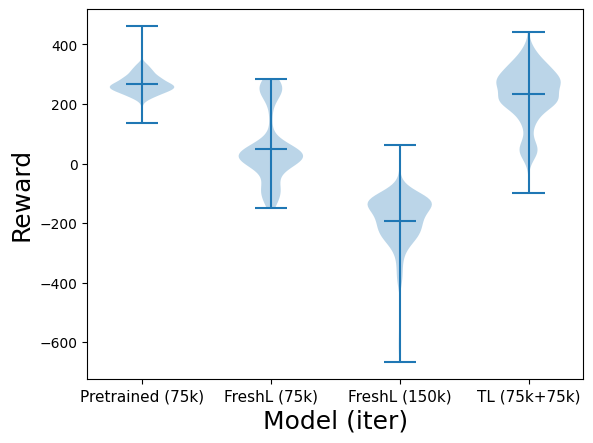

In [ ]:
print(np.mean(episode_rewards))
print(np.mean(episode_rewardsCp_r))
print(np.mean(episode_rewardsCp))
print(np.mean(episode_rewardsCp_tl))

all_rewards = [episode_rewards,episode_rewardsCp_r,episode_rewardsCp,episode_rewardsCp_tl]


plt.figure();
plt.violinplot(all_rewards,showmeans=True,showextrema=True);

labels = ['Pretrained (75k)','FreshL (75k)', 'FreshL (150k)', 'TL (75k+75k)'];
plt.xticks(ticks=np.arange(1,len(all_rewards)+1,1),labels=labels,fontsize=11);
plt.xlabel('Model (iter)',fontsize=18);
plt.ylabel('Reward',fontsize=18);

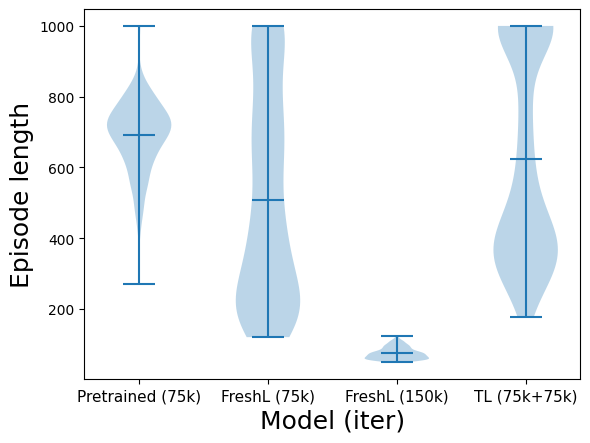

In [ ]:
all_lengths = [episode_lengths,episode_lengthsCp_r,episode_lengthsCp,episode_lengthsCp_tl]


plt.figure();
plt.violinplot(all_lengths,showmeans=True,showextrema=True);

labels = ['Pretrained (75k)','FreshL (75k)', 'FreshL (150k)', 'TL (75k+75k)'];
plt.xticks(ticks=np.arange(1,len(all_rewards)+1,1),labels=labels,fontsize=11);
plt.xlabel('Model (iter)',fontsize=18);
plt.ylabel('Episode length',fontsize=18);

In [ ]:
print(f"*** % of trials landed ***\nPretrained: {ratio_landed}\nFreshL_r: {ratio_landedCp_r}\nFreshL: {ratio_landedCp}\nTL: {ratio_landedCp_tl}")

print(f"\n\n*** % of trials with checkpoint visited ***\nPretrained: {ratio_cp}\nFreshL_r: {ratio_cpCp_r}\nFreshL: {ratio_cpCp}\nTL: {ratio_cpCp_tl}")


*** % of trials landed ***
Pretrained: 99.0
FreshL_r: 20.2
FreshL: 0.0
TL: 53.4


*** % of trials with checkpoint visited ***
Pretrained: 0.6
FreshL_r: 48.8
FreshL: 0.0
TL: 10.6


In [ ]:
# plt.hist(episode_rewards);
# plt.hist(episode_rewardsOC);

# import scipy
# stats = scipy.stats.mannwhitneyu(episode_rewards,episode_rewardsOC)
# print(stats.pvalue)